# **Oasis Infobyte - Data Science Internship**

# **TASK 3 - EMAIL SPAM DETECTION WITH MACHINE LEARNING**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

#### In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

#### Dataset link :- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Loading and Understanding dataset

In [2]:
data = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Cleaning & Evaluating for missing data and null values of data

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

There are many null or NaN values in the dataset

In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

Now our data is clean.

In [11]:
data = data.rename(columns={'v1':'Target','v2':'Message'})

In [12]:
data.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Visualization

<Axes: title={'center': 'Histogram of Spam and Ham'}, xlabel='Target'>

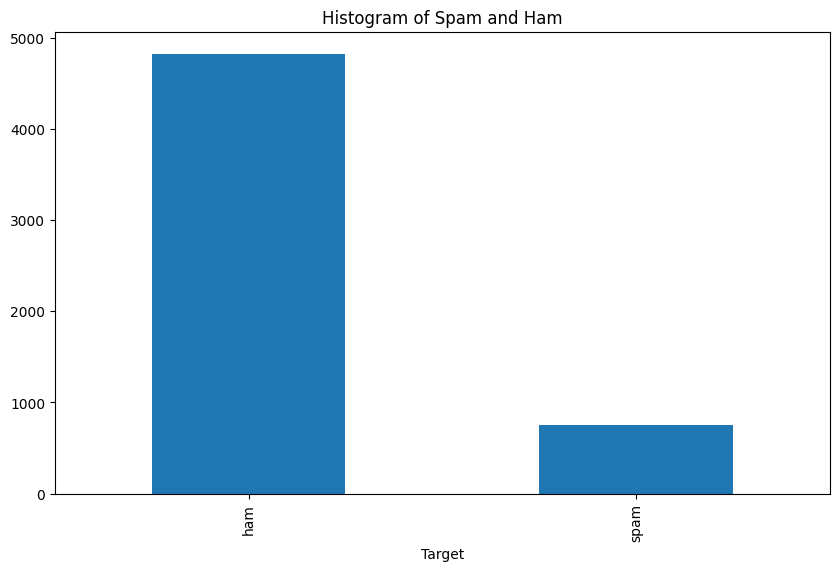

In [13]:
data['Target'].value_counts().plot(kind='bar',figsize=(10,6),title="Histogram of Spam and Ham",xlabel="Target")

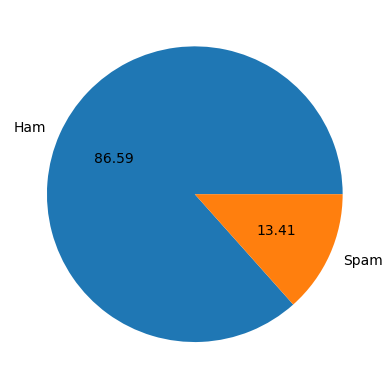

In [14]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

### Label Encoding

In [15]:
encoder=LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int64

In [16]:
data.head(10)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Separating features and Spiting Data

In [17]:
x = data['Message']
y = data['Target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = .8)

In [19]:
print('Train set of features: ', X_train.count())
print('Test set of features: ', X_test.count())
print('Target for train: ', y_train.count())
print('Target for test: ', y_test.count())

Train set of features:  4457
Test set of features:  1115
Target for train:  4457
Target for test:  1115


In [20]:
cv = CountVectorizer()

In [21]:
X_train_vector=cv.fit_transform(X_train.values)
X_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)

### Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train_cv,y_train)

LogisticRegression()

In [24]:
y_pred_lr = lr.predict(X_test_cv)
print("Accuracy score :", accuracy_score(y_test,y_pred_lr))

Accuracy score : 0.9838565022421525


### K-Nearest Neighbors (KNN)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train_cv,y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn = knn.predict(X_test_cv)
print("Accuracy score :", accuracy_score(y_test,y_pred_knn))

Accuracy score : 0.9112107623318386


### Random Forest

In [27]:
RF = RandomForestClassifier()
RF.fit(X_train_cv,y_train)

RandomForestClassifier()

In [29]:
y_pred_RF = RF.predict(X_test_cv)
print("Accuracy score :", accuracy_score(y_test,y_pred_RF))

Accuracy score : 0.9838565022421525


### Conclusion - As we can see, we used 3 Algorithms to predict and Random Forest Algorithm is giving us best accuracy of 0.983 approx.

## **--------------------------------------------Thank You--------------------------------------------**